In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
input_filename = "Volume_CSV/results.csv"

with open(input_filename, 'r') as f:
        ni = int(f.readline().strip().split('=')[1])
        nj = int(f.readline().strip().split('=')[1])
        nk = int(f.readline().strip().split('=')[1])
    
    
df = pd.read_csv(input_filename, skiprows=3)
data = {col: df[col].to_numpy().reshape((ni, nj, nk)) for col in df.columns}

In [3]:
blausius = np.loadtxt("blausius_table.csv", delimiter=",", skiprows=1)
eta = blausius[:, 0]
dfdeta = blausius[:, 1]
eta_dfdeta_minusf = blausius[:, 2]

In [4]:
iCheck  = 50

U = data['Velocity X'][iCheck, -1, 0]
y = data['y'][iCheck, :, 0]
x = data['x'][iCheck, :, 0]
nu = 1.48E-5

etaFlow = y / (nu * x / U)**0.5

ublausius = U * dfdeta
vblausius = 0.5 * (U * nu / x[0]) ** 0.5 * eta_dfdeta_minusf

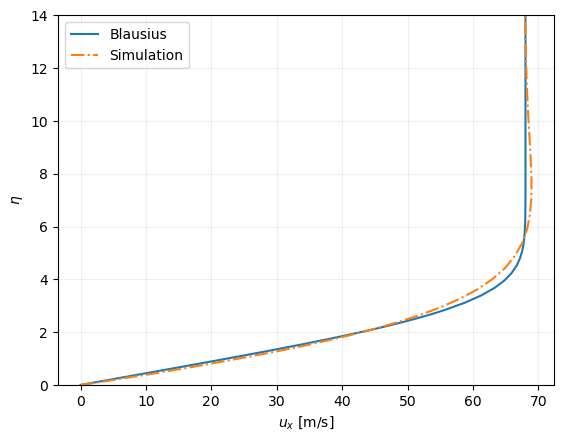

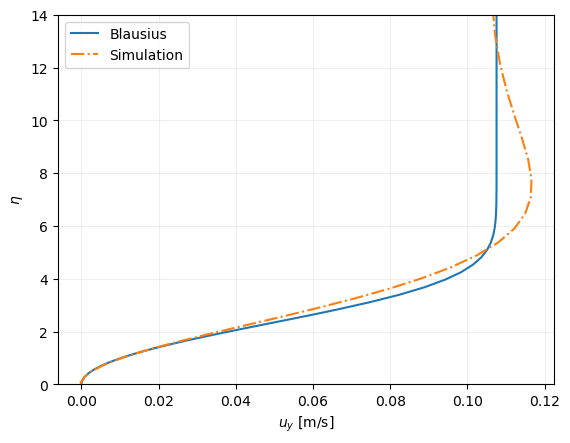

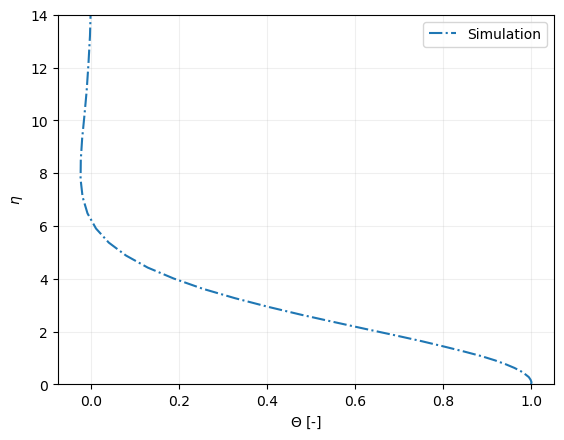

In [5]:
plt.figure()
plt.plot(ublausius, eta, label='Blausius')
plt.plot(data['Velocity X'][iCheck, :, 0], etaFlow, '-.',label='Simulation')
plt.ylim(0, eta.max())
plt.legend()
plt.ylabel(r'$\eta$')
plt.xlabel(r'$u_x$ [m/s]')
plt.grid(alpha=0.2)

plt.figure()
plt.plot(vblausius, eta, label='Blausius')
plt.plot(data['Velocity Y'][iCheck, :, 0], etaFlow, '-.',label='Simulation')
plt.ylim(0, eta.max())
plt.legend()
plt.ylabel(r'$\eta$')
plt.xlabel(r'$u_y$ [m/s]')
plt.grid(alpha=0.2)


theta = (data['Temperature'][iCheck, :, 0] - data['Temperature'][iCheck, -1, 0]) / (data['Temperature'][iCheck, 0, 0] - data['Temperature'][iCheck, -1, 0])
plt.figure()
# plt.plot(vblausius, eta, label='Blausius')
plt.plot(theta, etaFlow, '-.',label='Simulation')
plt.ylim(0, eta.max())
plt.legend()
plt.ylabel(r'$\eta$')
plt.xlabel(r'$\Theta$ [-]')
plt.grid(alpha=0.2)
